In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


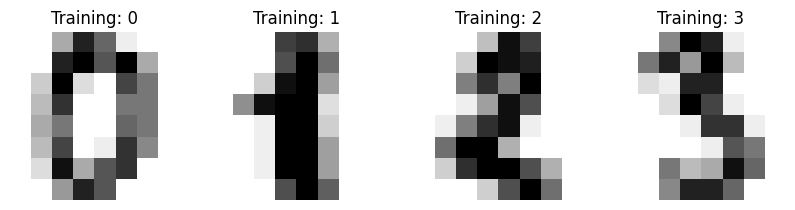

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=365, stratify=y)

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
x_train = np.asarray(X_train)
x_test = np.asarray(X_test)

In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1437, 64) (1437,)
Test set: (360, 64) (360,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [ ]:
x_train[0:1]

array([[ 0.00000000e+00, -3.43522453e-01, -1.08776211e+00,
         5.18147431e-01,  5.00750353e-01, -8.50731595e-01,
        -4.14062562e-01, -1.18360259e-01, -6.14166374e-02,
        -6.23118365e-01, -1.35331965e+00,  1.00765120e+00,
         7.80339320e-01, -1.34980940e+00, -5.27415197e-01,
        -1.23461326e-01, -4.31180707e-02, -7.24233758e-01,
         2.59160002e-02,  1.54091713e+00, -8.33759940e-01,
        -1.26209985e+00, -5.56012746e-01, -1.10838322e-01,
        -3.73326696e-02, -7.82510131e-01,  1.11850575e+00,
         1.20945342e+00, -3.16262962e-01, -7.75552997e-01,
        -6.28330510e-01, -5.28331981e-02,  0.00000000e+00,
         1.89076623e-01,  1.31722859e+00,  9.31162753e-01,
        -3.83603266e-01,  8.96120344e-01, -2.60895231e-01,
         0.00000000e+00, -6.76445597e-02, -5.28955643e-01,
         1.39154365e+00,  5.74674359e-01, -1.22628912e+00,
         4.80034264e-01,  1.52388036e+00, -8.55950017e-02,
        -2.94608883e-02, -4.13726082e-01,  2.65284929e-0

In [ ]:
def create_feedforward_nn(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])


    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
input_shape = (64,)
num_classes = 10

model = create_feedforward_nn(input_shape, num_classes)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 2s 8ms/step - loss: 1.8394 - accuracy: 0.5365 - val_loss: 0.4808 - val_accuracy: 0.8472
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.9033 - val_loss: 0.2273 - val_accuracy: 0.9306
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.9506 - val_loss: 0.1822 - val_accuracy: 0.9444
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9694 - val_loss: 0.1378 - val_accuracy: 0.9583
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9798 - val_loss: 0.1140 - val_accuracy: 0.9667
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0721 - accuracy: 0.9819 - val_loss: 0.1115 - val_accuracy: 0.9556
Epoch 7/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0974 - val_accuracy: 0.9778
Epoch 8/10
45/45 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

12/12 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9806
Test Accuracy: 0.980555534362793
Test Loss: 0.08204019069671631
